## Loading the Fashion MNIST database...

In [100]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from keras import regularizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from numpy.random import seed
from tensorflow import set_random_seed
from keras import regularizers
from keras.models import Sequential
from keras.layers import Input,Dense, Activation


In [101]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [103]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

4431872/4422102 [==============================] - 4s 1us/step


In [104]:
input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = np_utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]



In [105]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Exercises

### 1.1 Regularization

1.1.1 Define a new model using the keras sequential API. The model must have four hidden layers with the following neurons [128,64,32,16]. For all the hidden layers use the 'relu' activation function.

In [109]:
from keras.models import Model
seed(1)
set_random_seed(2)

# This returns a tensor
inputs = Input(shape=(X_train.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Run the following cell to train and test the model.

In [110]:
from keras import optimizers
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

('Accuracy = ', 78.03999999999999, '%')


Create a graph with the histogram of the network weigths in the first hidden layer

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_75 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_76 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


In [112]:
pos1 = model.layers[1].get_weights()[0]
pos2 = model.layers[1].get_weights()[1]
print(pos1.shape, pos2.shape)

((784, 128), (128,))


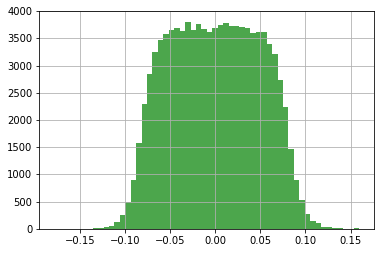

In [124]:
weigth = model.layers[1].get_weights()[0].flatten()
plt.hist(weigth,bins=56, color='green', alpha=0.7)
plt.grid(True)
plt.show()

1.1.2 Modify the former model to include $L_2$ regularization to every layer of the former model. Define a regularization parameter equal to 0.0001. 

In [115]:
seed(1)
set_random_seed(2)
# This returns a tensor
inputs = Input(shape=(784,))

x = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(inputs)
x = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(x)
predictions = Dense(nb_classes, activation='softmax',kernel_regularizer=regularizers.l2(0.0001))(x)

# This creates a model that includes
# the Input layer and three Dense layers
model_l2 = Model(inputs=inputs, outputs=predictions)
model_l2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [116]:
model_l2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_80 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_81 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_82 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


Run the following cell to train and test the model

In [117]:
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_l2.compile(loss='categorical_crossentropy', optimizer=sgd)
model_l2.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model_l2.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

('Accuracy = ', 78.3, '%')


Create a graph with the histogram of the network weigths in the first hidden layer. Compare it with the histogram obtained in the previous exercise. Is there any effect due to the regularization?

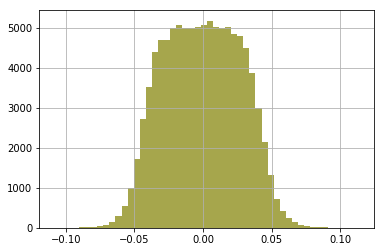

In [131]:
weigth_l2 = model_l2.layers[1].get_weights()[0].flatten()
plt.hist(weigth_l2, bins = 50, color='olive', alpha=0.7)
plt.grid(True)
plt.show()

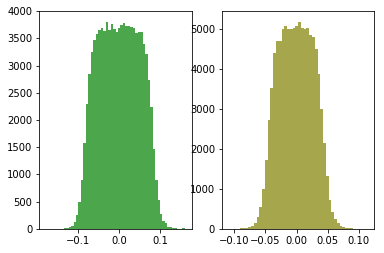

In [138]:
plt.figure(1)
plt.xlabel('Without regularizer')
plt.subplot(121)
plt.hist(weigth,bins=56, color='green', alpha=0.7)
#plt.xlabel('regularizer l2')
plt.subplot(122)
plt.hist(weigth_l2, bins = 50, color='olive', alpha=0.7)
plt.show()

In [140]:
print("Min value weigth without regularizer and l2 regularizer",weigth.min(), weigth_l2.min())
print("Max value weigth without regularizer and l2 regularizer",weigth.max(), weigth_l2.max())


('Min value weigth without regularizer and l2 regularizer', -0.17804004, -0.108258426)
('Max value weigth without regularizer and l2 regularizer', 0.15939689, 0.11354011)


1.1.3 Define a new model using the keras sequential API including $L_1$ and $L_2$ regularization methods for every layer. Define a regularization parameter equal to 0.0001 for both regularization terms.

In [184]:
seed(1)
set_random_seed(2)


del model_l12
model_l12 = Sequential()
model_l12.add(Dense(128, input_dim=input_dim, kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model_l12.add(Activation('relu'))
model_l12.add(Dense(64, input_dim=input_dim, kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model_l12.add(Activation('relu'))
model_l12.add(Dense(32, input_dim=input_dim, kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model_l12.add(Activation('relu'))
model_l12.add(Dense(16, input_dim=input_dim, kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model_l12.add(Activation('relu'))
model_l12.add(Dense(nb_classes, activation='softmax'))

Run the following cell to train the model and estimate the accuracy.

In [185]:
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_l12.compile(loss='categorical_crossentropy', optimizer=sgd)
model_l12.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=100, batch_size=16, validation_split=0, verbose=0)

preds = model_l12.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

('Accuracy = ', 57.53, '%')


Create a graph with the histogram of the network weigths in the first hidden layer. Compare it with the histograms obtained in the previous exercises. What is the effect of applying $L_1$ regularization?

In [188]:
print(model_l12.layers[0].get_weights())

[array([[ 0.04201139, -0.01535423,  0.0480631 , ...,  0.06322812,
         0.02462386, -0.04059782],
       [ 0.05343629, -0.04543277, -0.02057044, ..., -0.04254948,
         0.02003811, -0.02478533],
       [-0.03379624, -0.00988767, -0.01666937, ..., -0.11408246,
         0.01099436,  0.02052618],
       ...,
       [ 0.01119984, -0.01363951, -0.00641967, ...,  0.00664383,
        -0.02784776, -0.00491876],
       [ 0.0365315 , -0.01393194,  0.03623383, ..., -0.07853494,
        -0.00670519, -0.04602747],
       [ 0.04322481,  0.00227764,  0.0153923 , ...,  0.0339768 ,
         0.04833724,  0.07566527]], dtype=float32), array([-0.03309564, -0.02019668, -0.03914726, -0.0229707 , -0.01964676,
       -0.03552552, -0.0434595 , -0.04265947, -0.0562045 , -0.03304557,
       -0.00880897, -0.03835896, -0.02930832, -0.07474093, -0.03906637,
       -0.06368566, -0.00790113, -0.02866846, -0.022322  , -0.0053568 ,
       -0.03846512, -0.03387121, -0.04926838, -0.04741129, -0.02537199,
       -0.

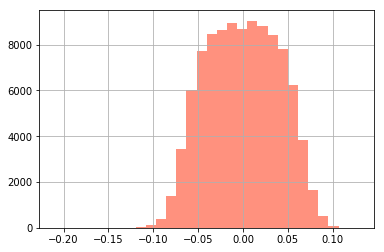

<Figure size 432x288 with 0 Axes>

In [189]:
weigth_l12 = model_l12.layers[0].get_weights()[0].flatten()
plt.hist(weigth_l12, bins = 30, color='tomato', alpha=0.7)
plt.grid(True)
plt.show()
plt.clf()

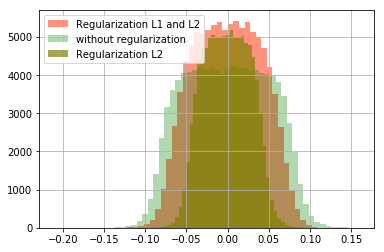

<Figure size 432x288 with 0 Axes>

In [194]:
plt.figure()
plt.hist(weigth_l12, bins=50, label='Regularization L1 and L2', color='tomato', alpha=0.7);
plt.hist(weigth, bins=50, label='without regularization',color='green', alpha=0.3);
plt.hist(weigth_l2, bins=50, label='Regularization L2 ', color='olive', alpha=0.7);
plt.legend()
plt.grid(True)
plt.show()
plt.clf()

### 1.2 Customized loss function

In [44]:
#Example MSE
from keras import backend as K

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

1.2.1 Use the backend component of keras (https://keras.io/backend/) to define the following loss function and use it to train the model.

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} w_{j}\log p_{model}[y_i \in C_j]$$

which corresponds to a weighted version of the categorical cross entropy loss function.

In [46]:
from keras import backend as K
def weighted_categorical_crossentropy(weights):
    
    weights = K.variable(weights)
    
    def loss(y_true, y_pred):
        loss = y_true * K.log(y_pred)*weights
        loss = -K.sum(loss)
            
        return loss
    
    return loss

1.2.2 Use the weighted categorical cross entropy function to train the MLP model with 3 layers defined at the begining of this document. Use the following weights = np.array([1,1,1,1,1,1,4,1,1,1]). Evaluate the model with the test dataset and plot the confusion matrix. 

In [47]:
weights = np.array([1,1,1,1,1,1,4,1,1,1])

In [171]:
from sklearn.metrics import confusion_matrix

loss_cat = weighted_categorical_crossentropy(weights)

del model
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss=weighted_categorical_crossentropy(weights), metrics=['accuracy'])


Train and validate the model. Compare the confusion matrix obtained using the weighted loss function with one obtained in the former class.

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 11s - loss: 39.8480 - acc: 0.5210 - val_loss: 37.0404 - val_acc: 0.5362
Epoch 2/10
 - 10s - loss: 40.4795 - acc: 0.5323 - val_loss: 31.2336 - val_acc: 0.4867
Epoch 3/10
 - 10s - loss: 39.4505 - acc: 0.5417 - val_loss: 37.2634 - val_acc: 0.5138
Epoch 4/10
 - 9s - loss: 40.3673 - acc: 0.5221 - val_loss: 41.6622 - val_acc: 0.4943
Epoch 5/10
 - 9s - loss: 39.3951 - acc: 0.5424 - val_loss: 37.9439 - val_acc: 0.5383
Epoch 6/10
 - 9s - loss: 39.0594 - acc: 0.5471 - val_loss: 42.9512 - val_acc: 0.5225
Epoch 7/10
 - 10s - loss: 38.9748 - acc: 0.5514 - val_loss: 37.9686 - val_acc: 0.4870
Epoch 8/10
 - 10s - loss: 39.2767 - acc: 0.5599 - val_loss: 37.1630 - val_acc: 0.4977
Epoch 9/10
 - 12s - loss: 38.6366 - acc: 0.5560 - val_loss: 35.0955 - val_acc: 0.5383
Epoch 10/10
 - 12s - loss: 38.9324 - acc: 0.5486 - val_loss: 38.5019 - val_acc: 0.5533


([<matplotlib.axis.YTick at 0x7fc848b455d0>,
 <a list of 10 Text yticklabel objects>)

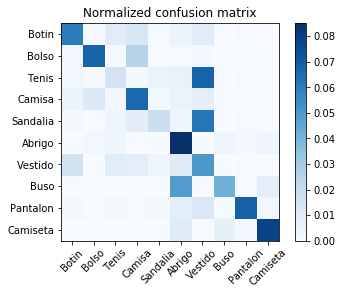

In [172]:
from sklearn.metrics import confusion_matrix

objects = ('Botin', 'Bolso', 'Tenis', 'Camisa', 'Sandalia', 'Abrigo', 'Vestido', 'Buso', 'Pantalon', 'Camiseta')

model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)
preds = model.predict_classes(X_testN, verbose=0)
cm = confusion_matrix(y_test, preds)
cm = cm/np.float(np.sum(cm))
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects)
